# 서포트 벡터 머신

퍼셉트론은 가장 단순하고 빠른 판별 함수 기반 분류 모형이지만 판별 경계선(decision hyperplane)이 유니크하게 존재하지 않는다는 특징이 있다. 서포트 벡터 머신(SVM: support vector machine)은 퍼셉트론 기반의 모형에 가장 안정적인 판별 경계선을 찾기 위한 제한 조건을 추가한 모형이라고 볼 수 있다. 

<img src="https://datascienceschool.net/upfiles/632bf7973c904579954235a61cc340e1.png" style="width:100%; margin: 0 auto 0 auto;">

## 마진

판별함수 모형에서 직선인 판별 함수 $f(x)$는 다음과 같은 수식으로 나타낼 수 있다.

$$ f(x) = w^Tx-w_0 $$ 

다음과 같이 $N$개의 학습용 데이터가 있다고 하자.

$$ (x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N) $$

여기에서 y 데이터는 $y^+$, $y^-$ 두 개의 값을 가질 수 있다.

만약 $i$번째 데이터의 $y$ 값이 $y^+$였다면 그 데이터에 대한 판별함수 값은 양수가 된다.

$$ f(x_i) = w^Tx_i - w_0 > 0 $$

반대로 $i$번째 데이터의 $y$ 값이 $y^-$였다면 그 데이터에 대한 판별함수 값은 음수가 된다.

$$ f(x_i) = w^Tx_i - w_0 < 0 $$

모든 데이터에 대해 두 부등식 중 하나가 성립해야 한다.

$y$ 값이 $y^+$인 데이터 중에서 판별함수의 값이 가장 작은 데이터를 $x^+$라고 하고  $y$ 값이 $y^-$인 데이터 중에서 판별함수의 값이 가장 큰 데이터를 $x^-$라고 하자. 그러면 다음 식이 성립한다.

$$ f(x^+) = w^Tx^+ - w_0 > 0 $$

$$ f(x^-) = w^Tx^- - w_0 < 0 $$

부호 조건만 지키면 되므로 실제로 $f(x^+)$, $f(x^-)$ 값은 어떤 값이 되어도 괜찮다. 따라서 다음과 같이 가정한다.

$$ f(x^+) = w^T x^{+} - w_0 = +1 $$


$$ f(x^-) = w^T x^{-} - w_0 = -1 $$

판별 경계선과 데이터 $x^{+}$, $x^{-}$ 사이의 거리는 다음과 같이 주어진다.

$$ \dfrac{w^T x^{+} - w_0}{\| w \|} = \dfrac{1}{\| w \|} $$

$$ -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{1}{\| w \|}  $$

이 거리의 합을 마진(margin)이라고 하며 마진값이 클 수록 더 경계선이 안정적이라고 볼 수 있다. 그런데 위에서 정한 스케일링에 의해 마진은 다음과 같이 정리된다.

$$ \dfrac{w^T x^{+} - w_0}{\| w \|}  -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{2}{\| w \|}$$

마진 값이 최대가 되는 경우는 $\| w \|$ 즉, $\| w \|^2$가 최소가 되는 경우와 같다. 즉 다음과 같은 목적함수를 최소화하면 된다.

$$ L = \dfrac{1}{2} ||w||^2  $$

또한 모든 표본 데이터에 대해 분류는 제대로 되어야 하므로 모든 데이터 $x_n, y_n \; ( i = 1, \ldots, N)$에 대해 다음 조건을 만족해야 한다.
위에서 스케일링을 사용하여 모든 데이터에 대해 $f(x_n) = w^Tx_n - w_o$ 가 1보다 크거나 -1보다 작게 만들었다는 점을 이용한다.

$$ y_n \cdot f(x_n) = y_n \cdot( w^Tx_n - w_o)\geq 1 $$

$$  g_n = y_n \cdot ( w^Tx_n - w_o) - 1 \geq 0$$

KKT(Karush–Kuhn–Tucker) 조건을 사용하면 최소화 목적 함수를 다음과 같이 고치면 된다.

$$ L = \dfrac{1}{2} ||w||^2 - \sum_{n=1}^N a_n g_n(x) $$

$$ L = \dfrac{1}{2} ||w||^2 - \sum_{n=1}^N a_n \{ y_n \cdot ( w^Tx_n - w_o) - 1 \} $$

여기에서 $a_n$은 $g_n(x)$에 대한 라그랑주 승수이다.

KKT 조건은 라그랑주 승수 방법과 비슷하지만 조건을 만족시킬 필요가 없는 경우, 즉, $(w^Tx_n - w_o) - 1 \neq 0 $인 경우에는 $a= 0$이 된다.

## Dual Form

최적화 조건은 목적 함수 $L$을 $w$, $w_0$로 미분한 값이 0이 되어야 하는 것이다.
$$ 
\dfrac{\partial L}{\partial w} = 0
$$

$$ 
\dfrac{\partial L}{\partial w_0} = 0
$$


이 식을 풀어서 정리하면 다음과 같아진다.

$$ 
w = \sum_{n=1}^N a_n y_n x_n
$$

$$ 
0 = \sum_{n=1}^N a_n y_n 
$$

이 두 수식을 원래의 목적 함수에 대입하여 $w$, $w_0$을 없애면 다음과 같다.

$$
L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m x_n^T x_m
$$
이 때 $a$는 다음 조건을 만족한다.
$$
\sum_{n=1}^N a_n y_n = 0, \;\;\; a_n \geq 0
$$

이 문제는 $w$를 구하는 문제가 아니라 $a$를 구하는 문제로 바뀌었으므로 dual form 이라고도 한다.


dual form 문제는 수치적으로 Box 제한 조건이 있는 이차 프로그래밍 문제(quadratic programming)가 되므로 적은 연산량으로 풀 수 있다.

## 서포트

dual form 문제를 풀어 함수 $L$ 를 최소화하는 $a$를 구하면 예측 모형을 다음과 같이 쓸 수 있다.

$$
f(x) = w^T x - w_0 = \sum_{n=1}^N a_n y_n x_n^T x - w_0
$$


이차 프로그래밍(최적화)로 구한 라그랑주 승수 값이 0 즉, $a_n = 0$ 이면 해당 데이터는 예측 모형, 즉 $w$ 계산에 아무런 기여를 하지 않는다는 것을 알 수 있다.

만약 $n$번째 데이터에 대해 $a_n > 0$ 이면 조건 만족을 위해 $y_n(w^Tx_n - w_o) = 1$이 된다. 즉 판별함수 값 $w^Tx_n - w_o = \pm 1$ 이다.

이러한 데이터를 서포트(support)라고 한다.



마진을 정하는 x값두개 라그랑주 승수 an 값 만 구하면 되므로 적은 비용으로 서포트 벡터와 마진을 구할 수 있다 

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)

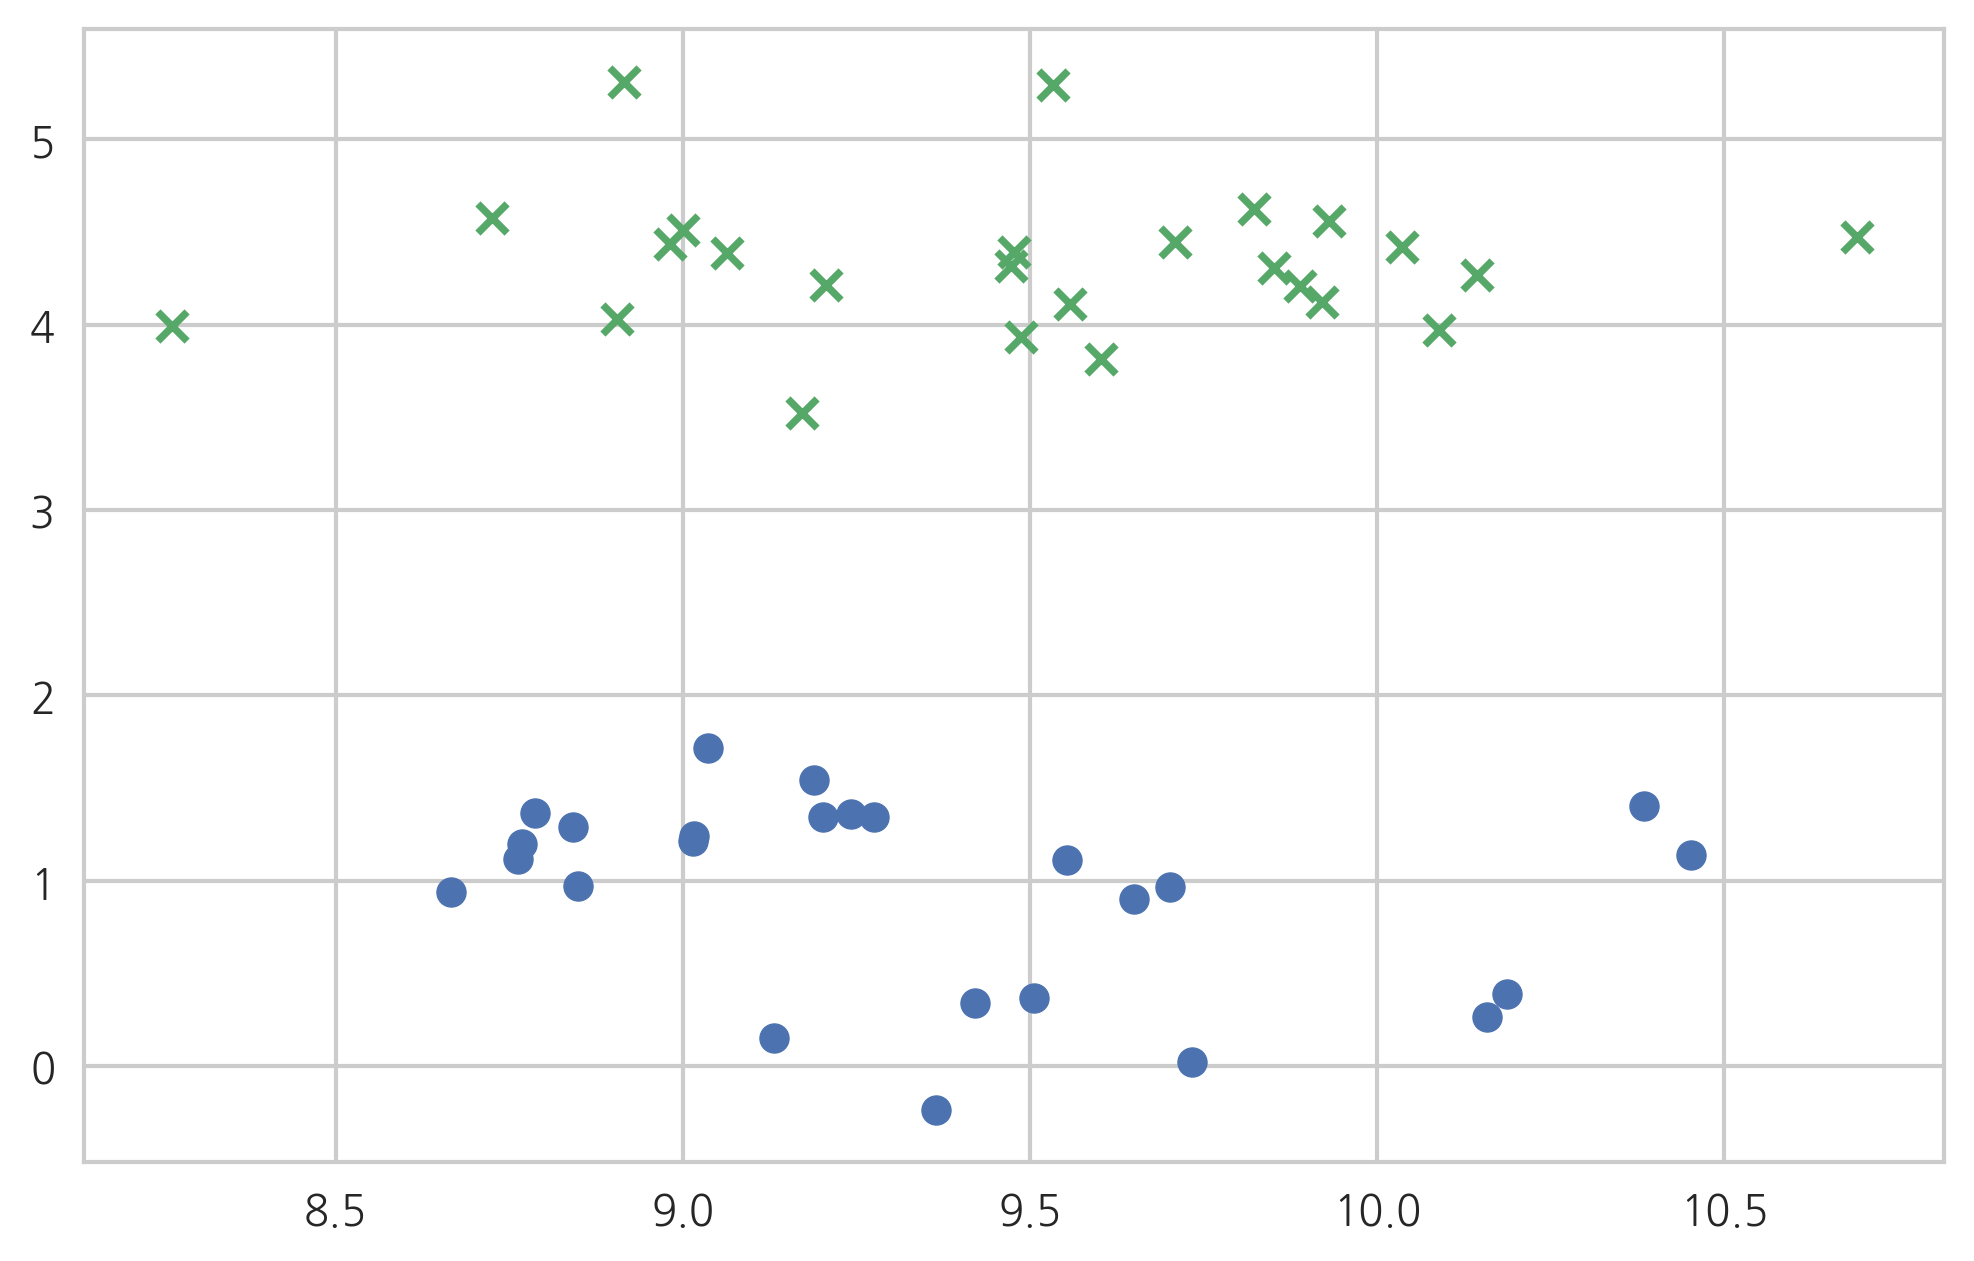

In [2]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.show()

In [3]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(X, y)

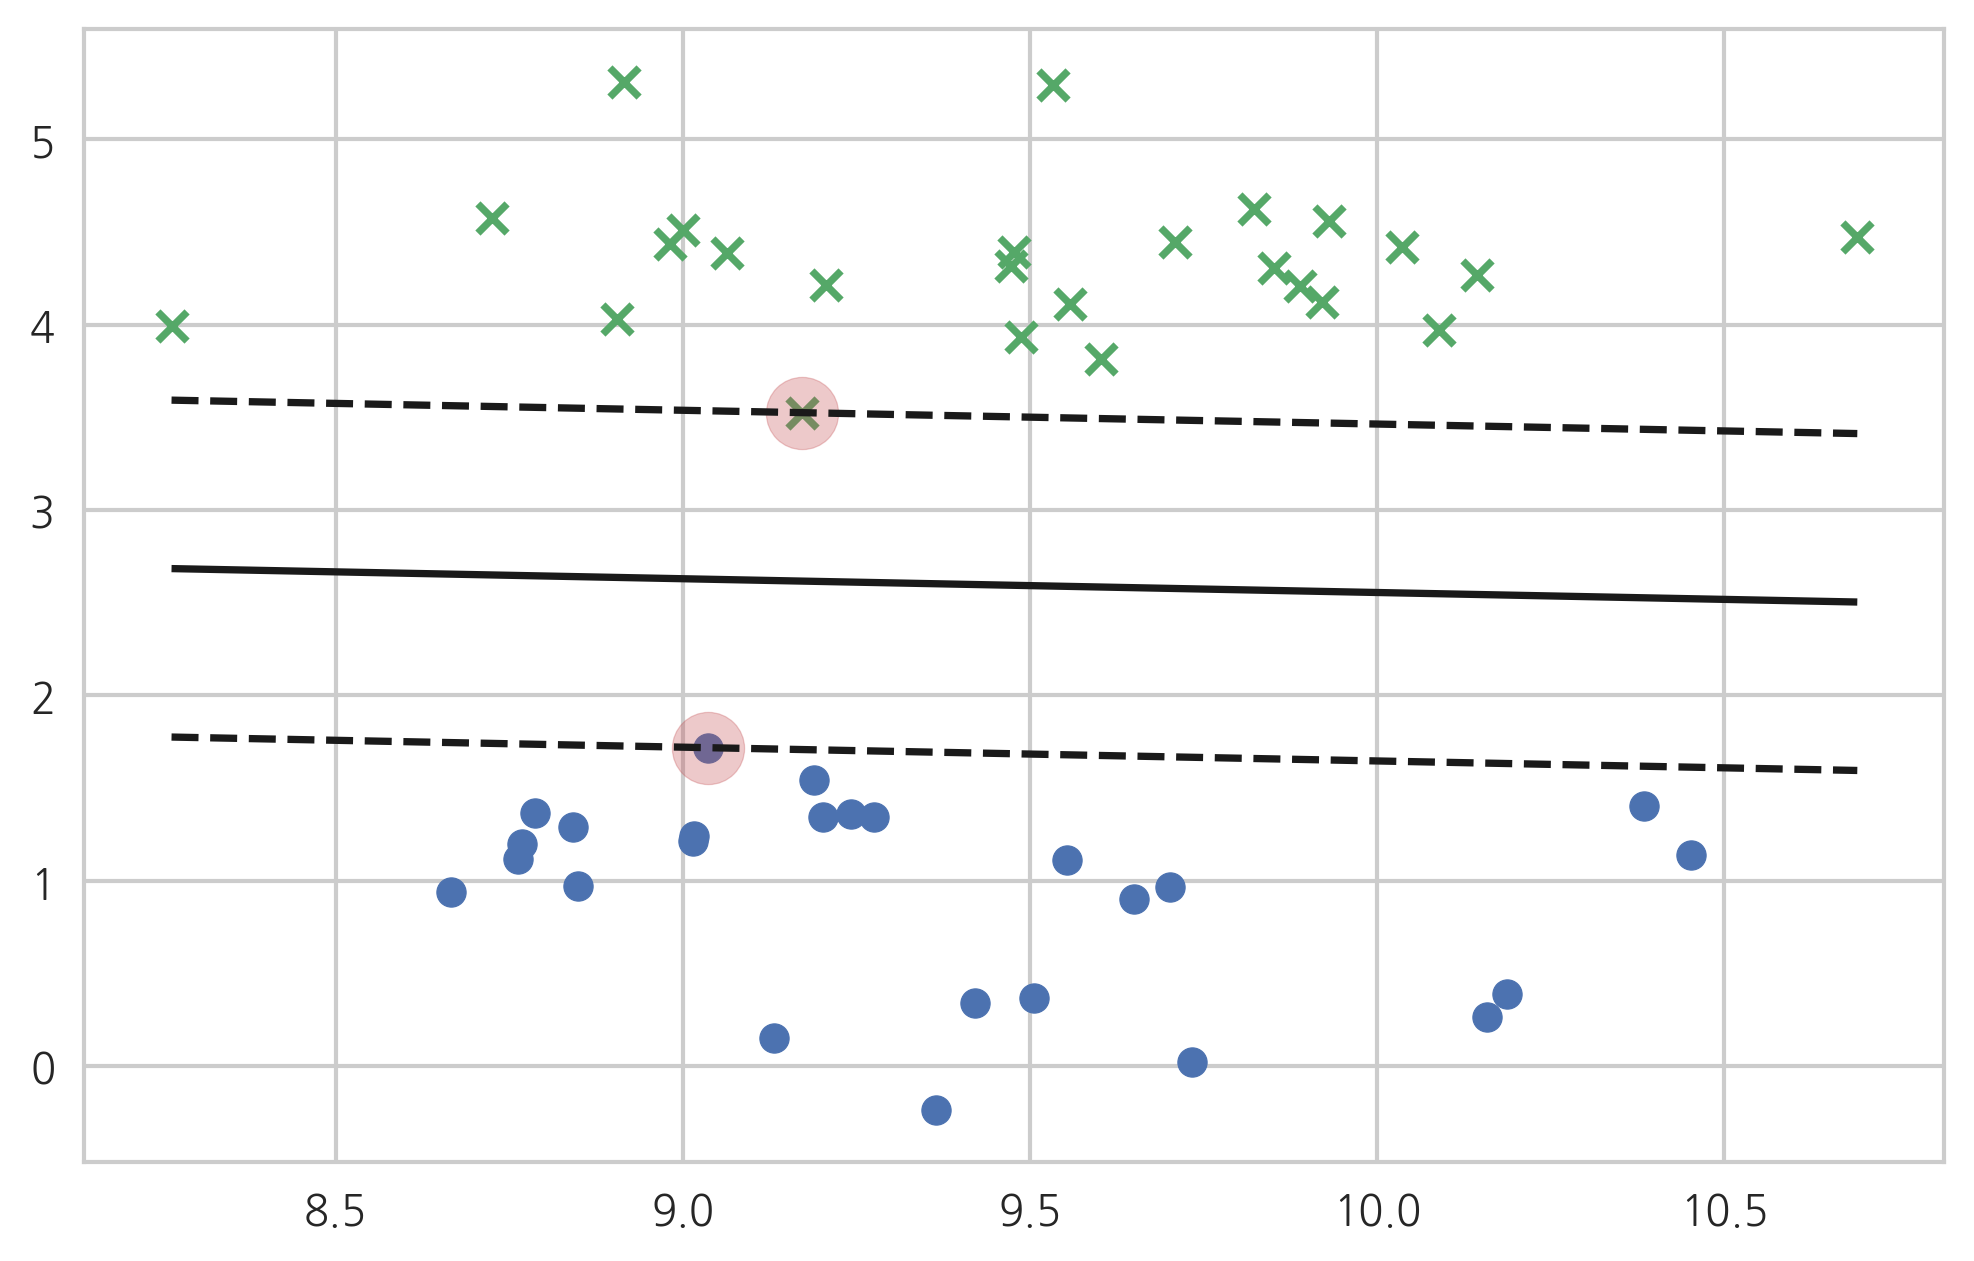

In [4]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)
plt.show()

In [5]:
x_new = [10, 2] ## 10,2 점을 넣었을경우 마진 안에 들어가는경우 값은 -0.7로 나온다 약 -1값에 나오므로 하늘색에 거의 포함된다는것을 알수 있다.
model.decision_function([x_new])

array([-0.61101582])

In [6]:
model.coef_.dot(x_new) + model.intercept_ ## model 의 계수W와 x_new의 값의 내적 그리고 절편은 위의 descision function값과 같다는것을 알수 있다.

array([-0.61101582])

In [7]:
model.support_vectors_ ## 2개 마진에서 제일 가까운 두개의 서포트 벡터들 

array([[ 9.03715314,  1.71813465],
       [ 9.17124955,  3.52485535]])

In [8]:
model.support_

array([42,  1], dtype=int32)

In [9]:
y[model.support_]

array([0, 1])

In [10]:
# dual_coef_ = a_i * y_i
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
model.intercept_

array([-0.61101582])

In [11]:
y[model.support_][1]

1

In [12]:
model.n_support_ 

array([1, 1], dtype=int32)

## 슬랙 변수

만약 데이터가 직선인 판별 경계선으로 나누어지지 않는 즉, 선형 분리(linear separable)가 불가능 한 경우에는 다음과 같이 슬랙 변수(slack variable)를 사용하여 개별적인 오차를 허용할 수 있다.

원래 판별 함수의 값은,

클래스 $+1$ 영역의 샘플 $x_{+}$에 대해 

$$ w^Tx_{+} - w_0 \geq 1 $$  

클래스 $-1$ 영역의 샘플 $x_{-}$에 대해 
 
$$ w^Tx_{-} - w_0 \leq -1 $$

이어야 한다.
 

양수인 슬랙 변수 $\xi \geq 0 $를 사용하면 이 조건을 다음과 같이 완화할 수 있다.


$$ w^Tx_{+} - w_0 \geq +1-\xi_i $$

$$ w^Tx_{-} - w_0 \leq -1+\xi_i $$

$$ \xi \geq 0 $$

대신 슬랙 변수의 크기를 제한해야 하므로 위의 부등식 조건을 모두 고려한 최적화 목적 함수는 다음과 같아진다.

$$ 
L = \dfrac{1}{2} ||w||^2 - \sum_{n=1}^N a_n (y_n \cdot ( w^Tx_n - w_o) - 1 + \xi_n ) - \sum_{n=1}^N \mu_n \xi_n  + C \sum_{n=1}^N \xi_n    $$



<img src="https://datascienceschool.net/upfiles/d5735e8d8db342858166a790f108e8fc.png" style="width:100%; margin: 0 auto 0 auto;">

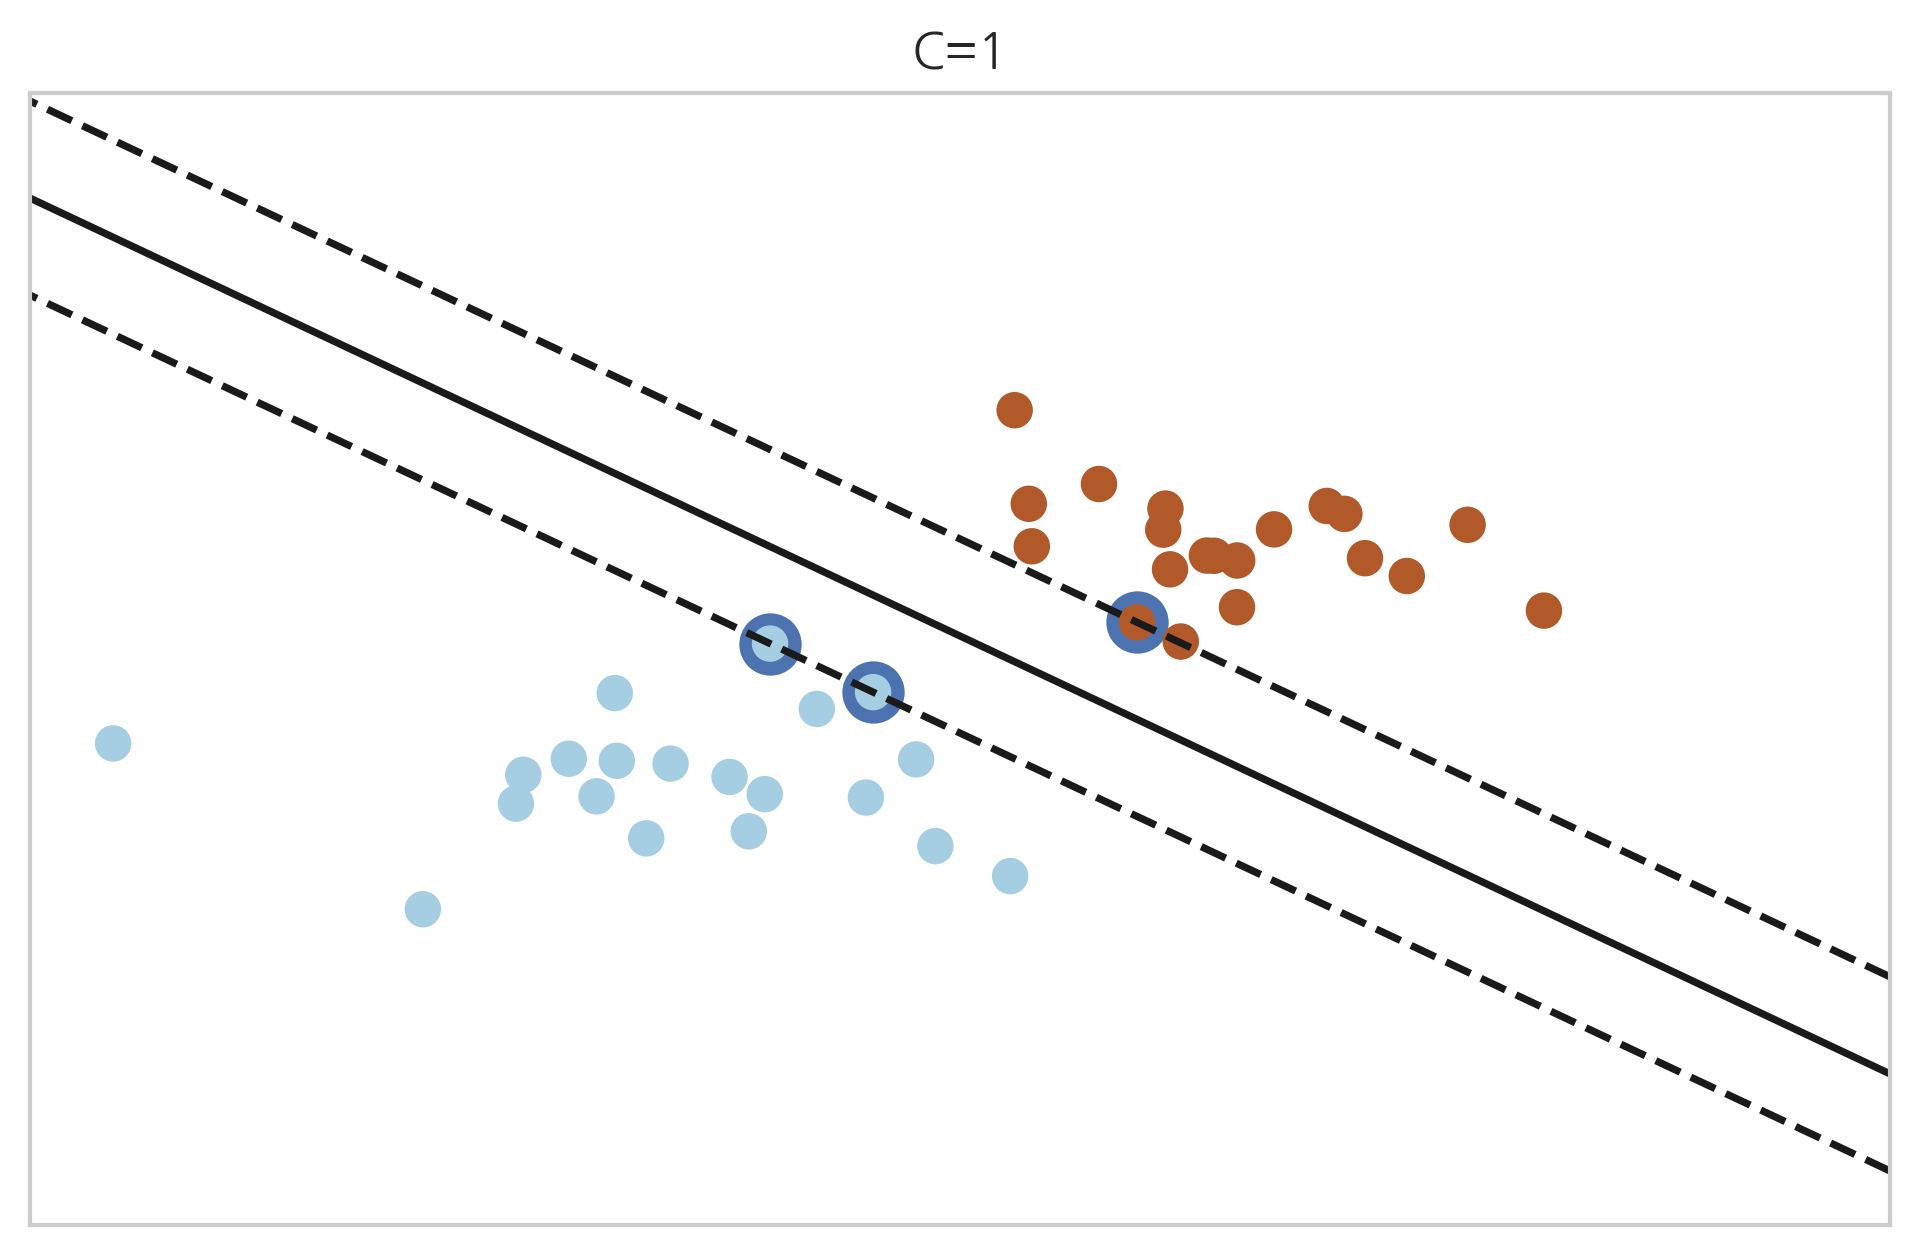

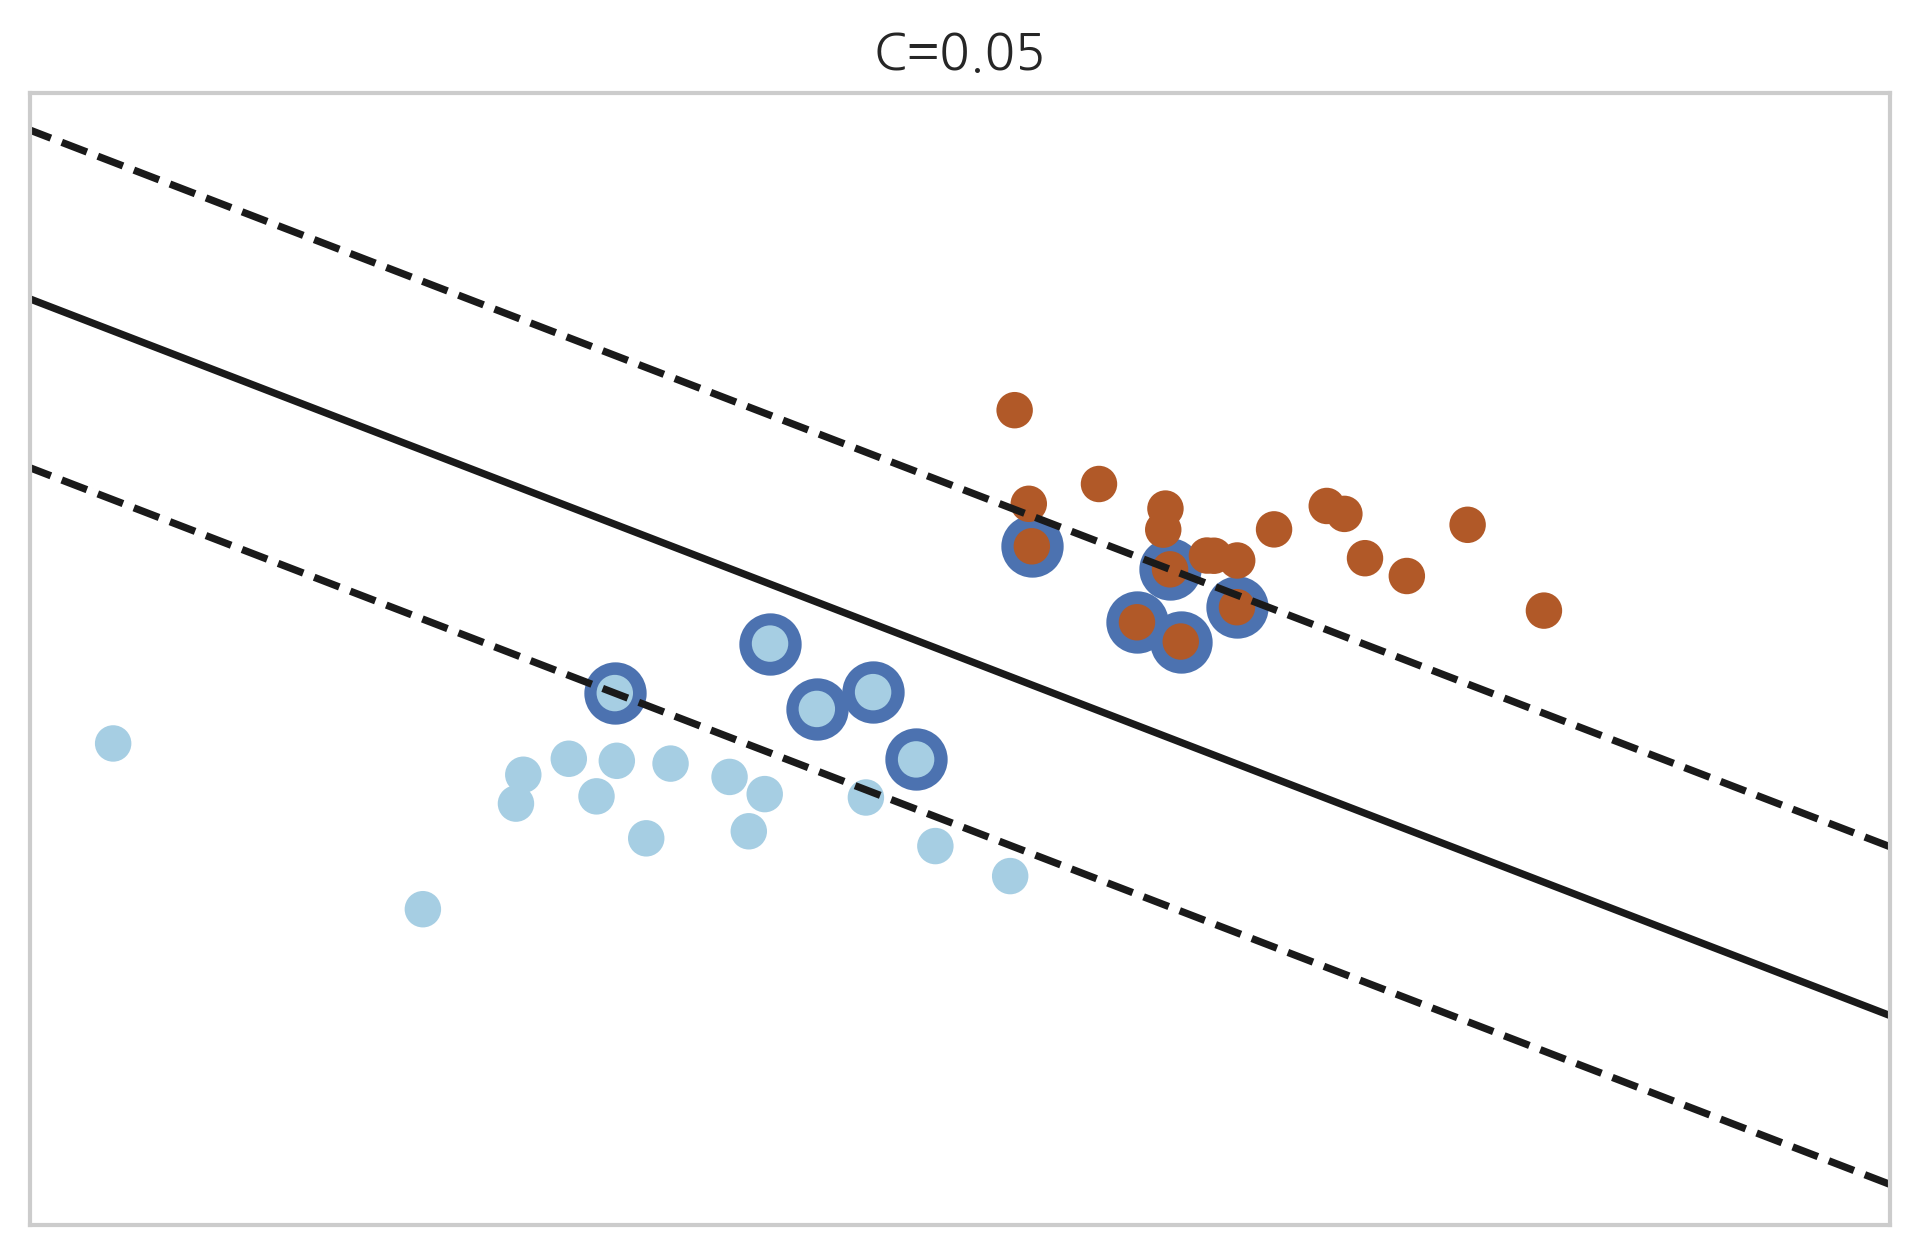

In [13]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

fignum = 1
for name, penalty in (('C=1', 1), ('C=0.05', 0.05)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)
    
    plt.figure(fignum)
    
    x_min = -5
    x_max = 5
    y_min = -9
    y_max = 9
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.axis('tight')
    plt.show()
    
    fignum += 1
    
    
    ## 파라미터 C를 사용하여 마진너비 제어한다. 
    ## 파라미터 c(an)가 큰값일때 벌칙을 커지게 하므로 더 적은 마진을 가지게 된다
    ## 파라미터 C가 작은 값일 경우 벌칙이 작아지고 그만큼 더 작은 마진을 가지게 된다 

## 얼굴 이미지 인식

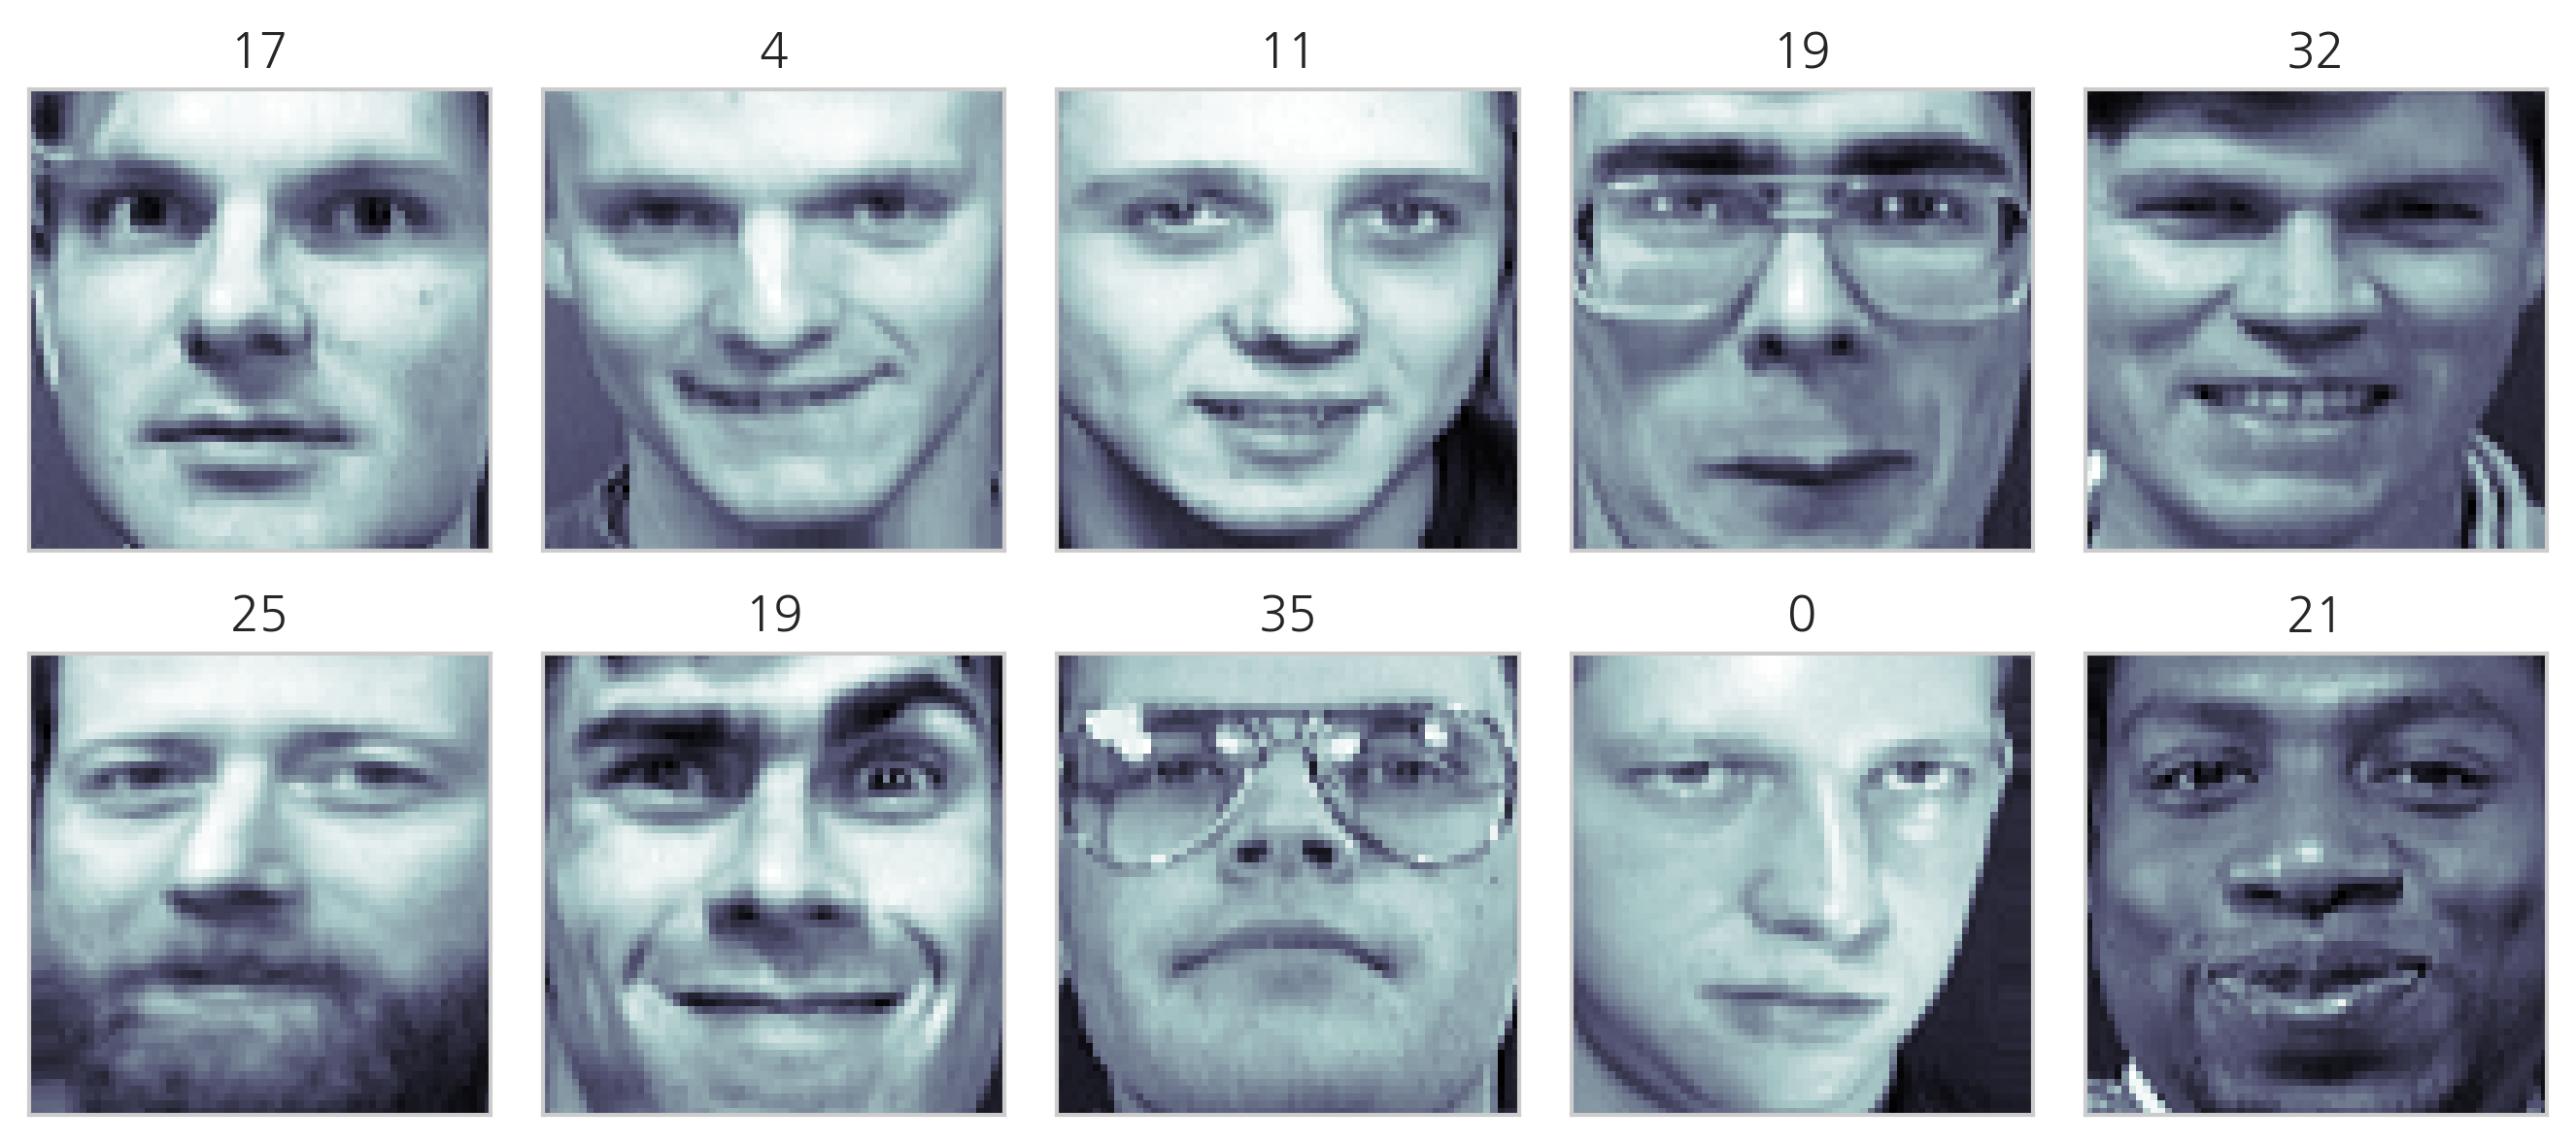

In [14]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

N=2; M=5;
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [25]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear').fit(X_train, y_train)

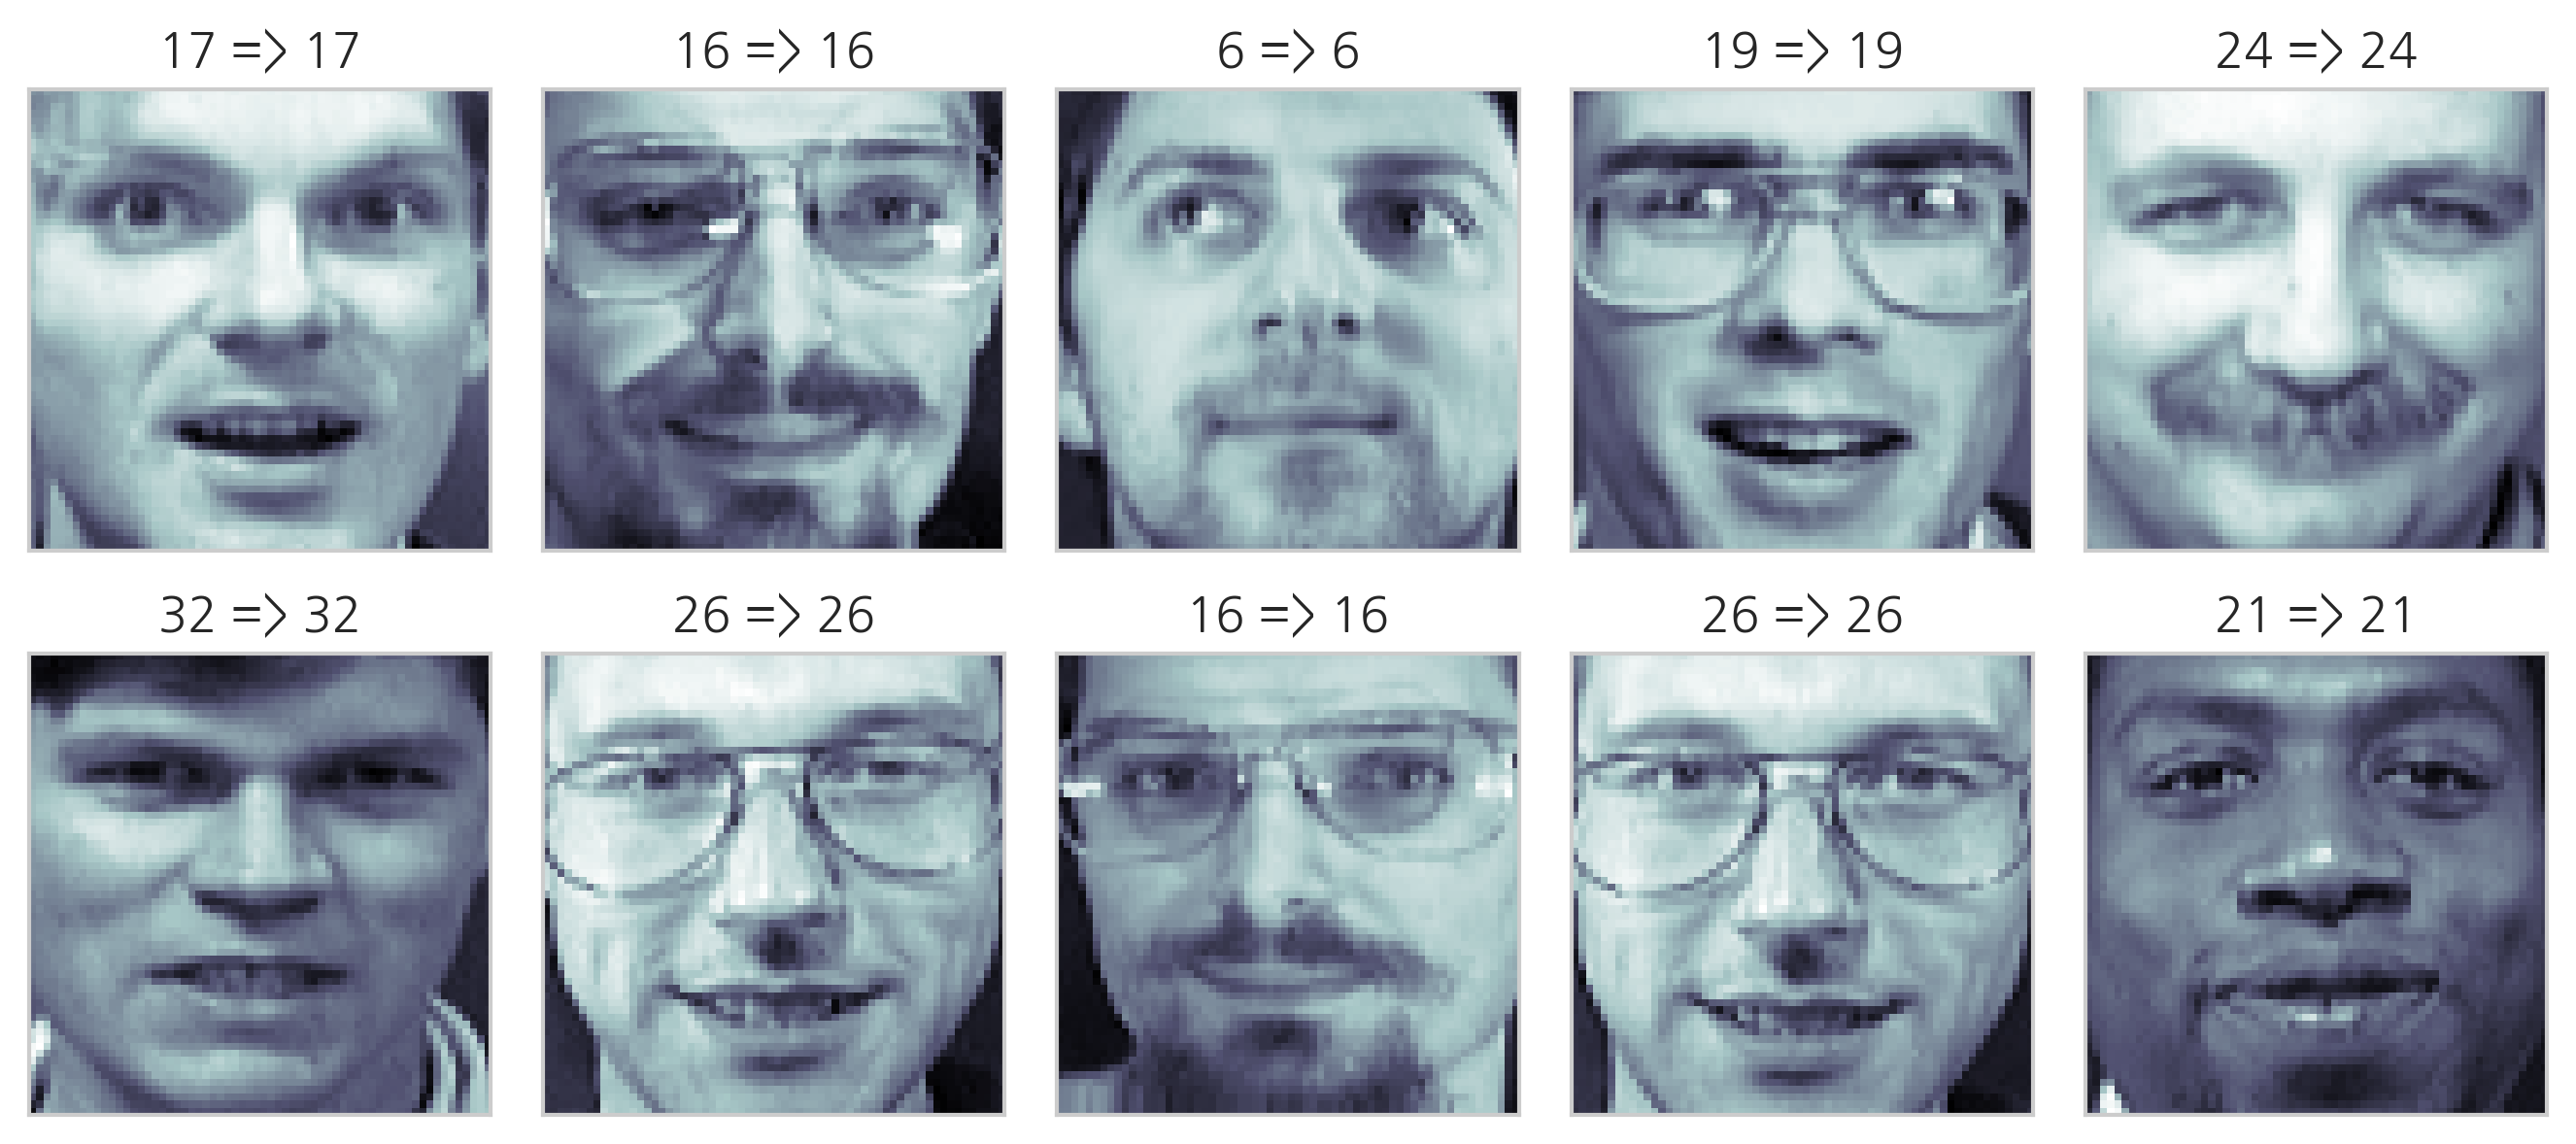

In [28]:
N=2; M=5;
np.random.seed(1)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(X_test[k:(k+1), :].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" % (y_test[k], svc_1.predict(X_test[k:(k+1), :])[0]))
plt.tight_layout()
plt.show()

In [21]:
glasses = [
    ( 10,  19), ( 30,  32), ( 37,  38), ( 50,  59), ( 63,  64),
    ( 69,  69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)## 안경쓴사람들을 벡터로 구분해줌 
]

def create_target(segments):
    y = np.zeros(faces.target.shape[0])
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

target_glasses = create_target(glasses)
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_glasses, test_size=0.25, random_state=0)

svc_2 = SVC(kernel='linear').fit(X_train, y_train)

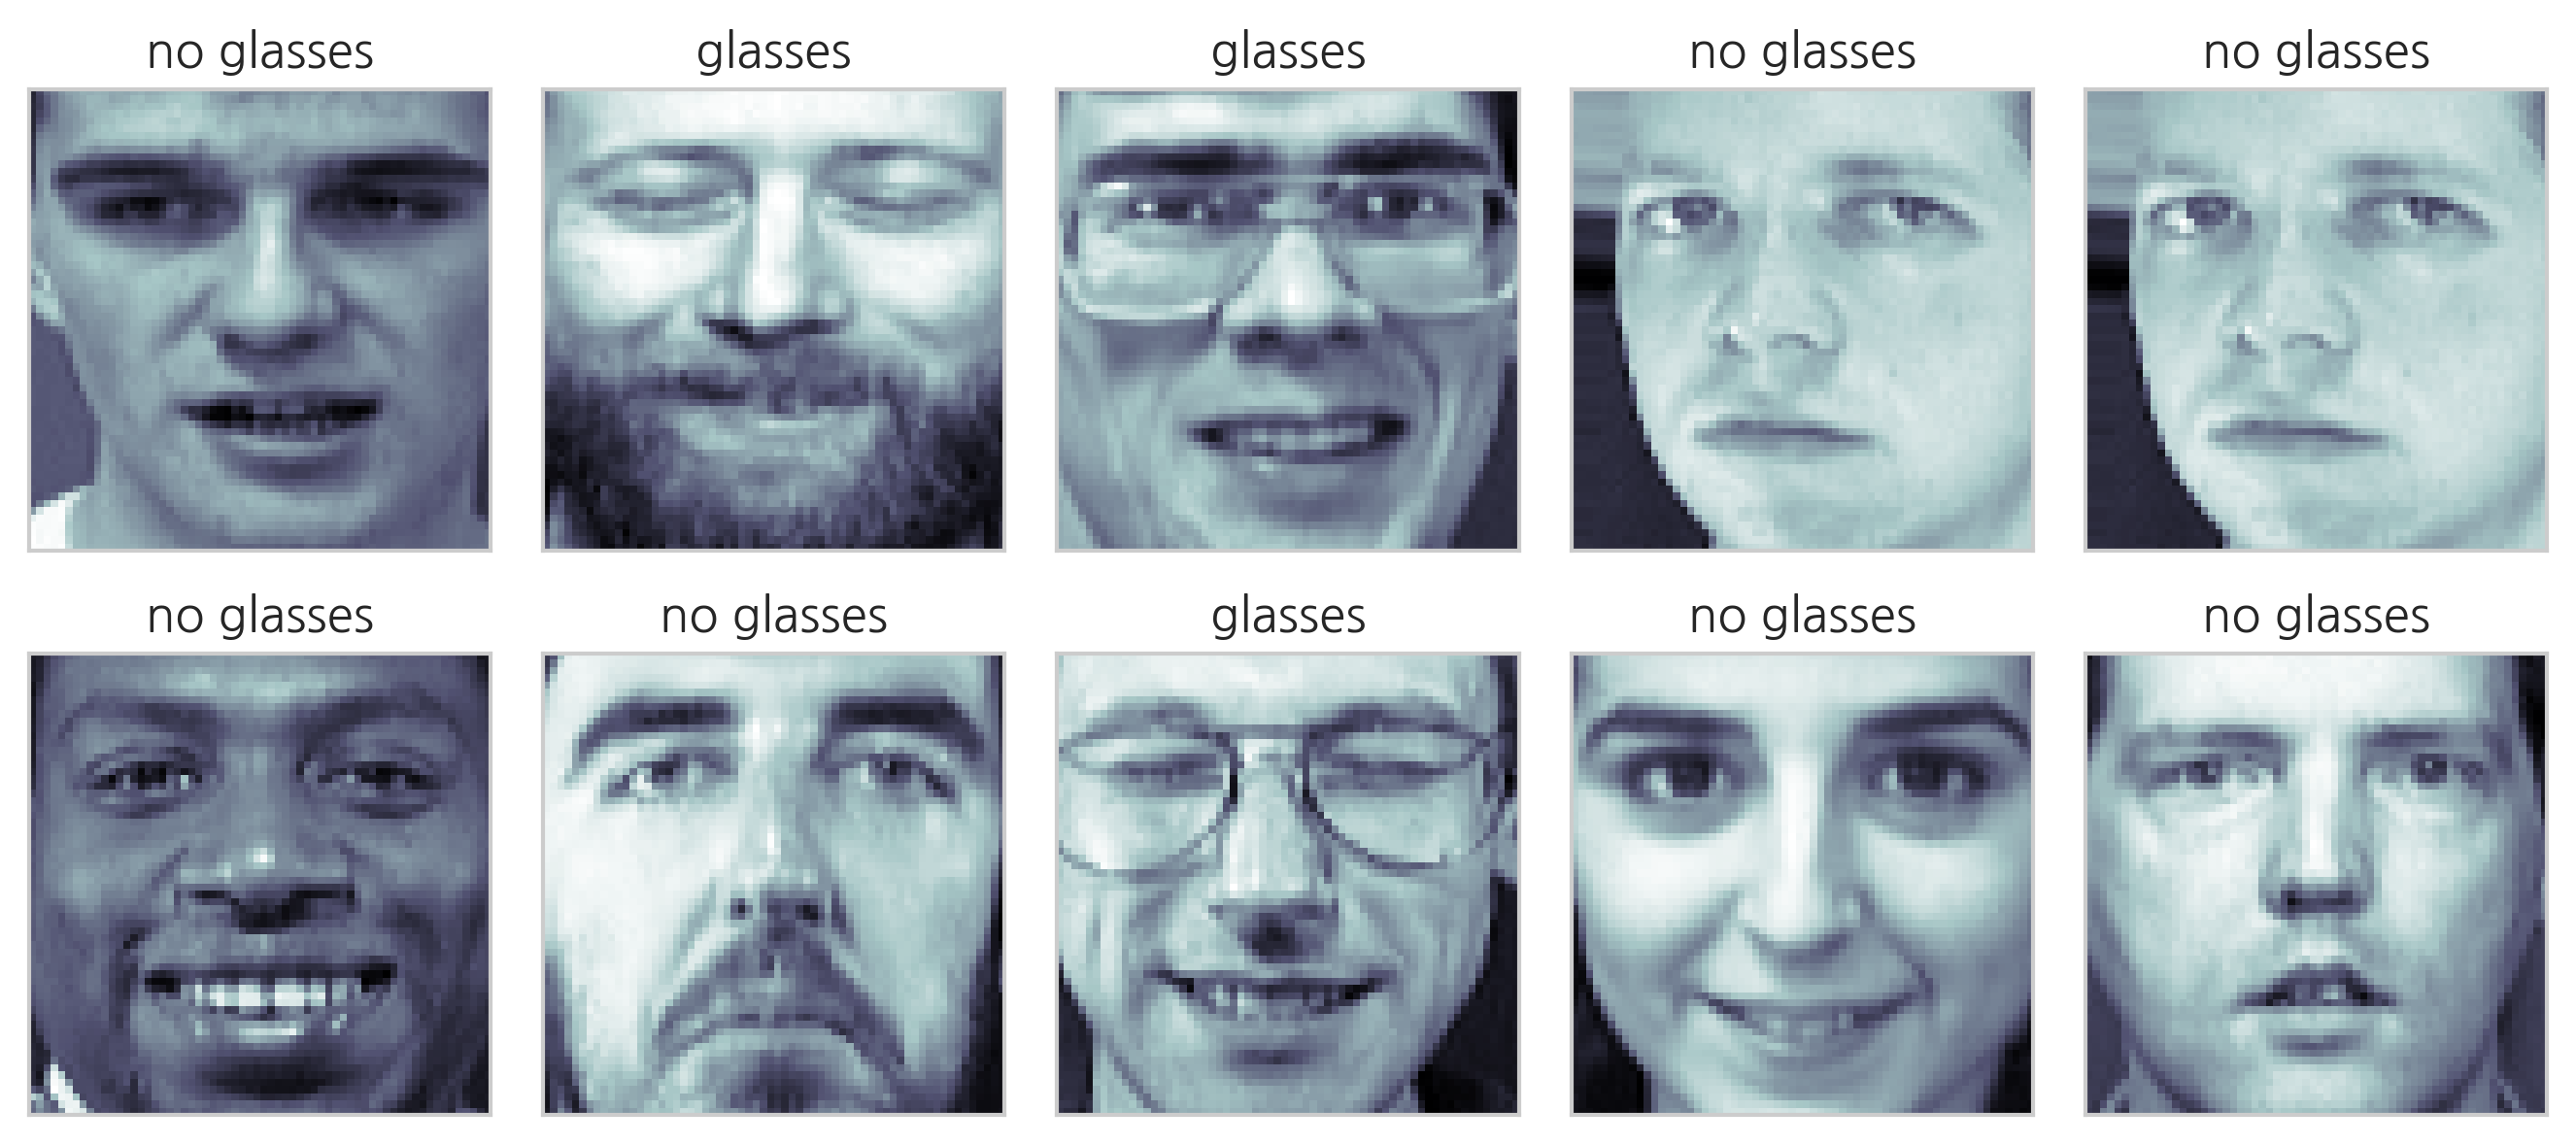

In [22]:
N=2; M=5;
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(X_test[k:(k+1), :].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%s" %  ("glasses" if (svc_2.predict(X_test[k:(k+1), :])[0]) else "no glasses"))
plt.tight_layout()
plt.show()